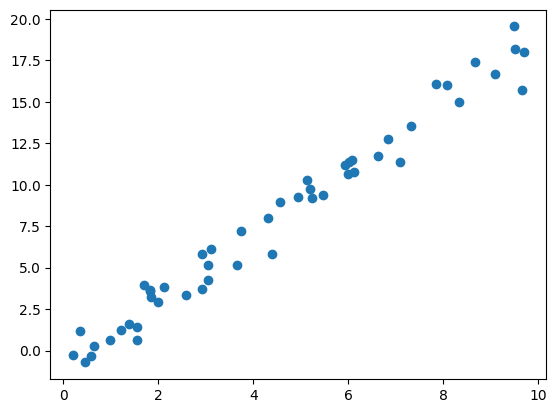

In [1]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

In [3]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

# Set the file path
path = "/Users/moiz/Downloads"
filename_read = os.path.join(path, "heart.csv")

# Load the dataset
data = pd.read_csv(filename_read)

# Data investigation
print("Dataset shape:", data.shape)
print("Dataset info:")
print(data.info())
print("\nDataset description:")
print(data.describe())

# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

# Check class balance
print("\nClass balance:")
print(data['HeartDisease'].value_counts())

# Separate features and target
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Identify categorical and numerical columns
categorical_columns = X_train.select_dtypes(include=['object']).columns
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns

# Create preprocessing pipelines
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_columns),
    ('num', numerical_transformer, numerical_columns)
])

# Define the models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Hyperparameter tuning and model evaluation
for model_name, model in models.items():
    print(f"\n{model_name}:")
    
    # Create a pipeline with preprocessing and the model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Define the hyperparameter grid for tuning
    if model_name == 'Logistic Regression':
        param_grid = {'model__C': [0.1, 1, 10]}
    elif model_name == 'Decision Tree':
        param_grid = {'model__max_depth': [3, 5, 7]}
    else:
        param_grid = {'model__n_estimators': [50, 100, 200]}
    
    # Perform grid search for hyperparameter tuning
    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    # Get the best model and evaluate on validation set
    best_model = grid_search.best_estimator_
    y_val_pred = best_model.predict(X_val)
    
    print("Validation Results:")
    print("Accuracy:", accuracy_score(y_val, y_val_pred))
    print("Precision:", precision_score(y_val, y_val_pred))
    print("Recall:", recall_score(y_val, y_val_pred))
    print("F1-score:", f1_score(y_val, y_val_pred))
    print("ROC AUC:", roc_auc_score(y_val, y_val_pred))
    
    # Train the best model on the combined training and validation sets
    best_model.fit(pd.concat([X_train, X_val]), pd.concat([y_train, y_val]))
    
    # Evaluate the model on the test set
    y_test_pred = best_model.predict(X_test)
    
    print("\nTest Results:")
    print("Accuracy:", accuracy_score(y_test, y_test_pred))
    print("Precision:", precision_score(y_test, y_test_pred))
    print("Recall:", recall_score(y_test, y_test_pred))
    print("F1-score:", f1_score(y_test, y_test_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_test_pred))

Dataset shape: (918, 12)
Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None

Dataset description:
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000

/Users/moiz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


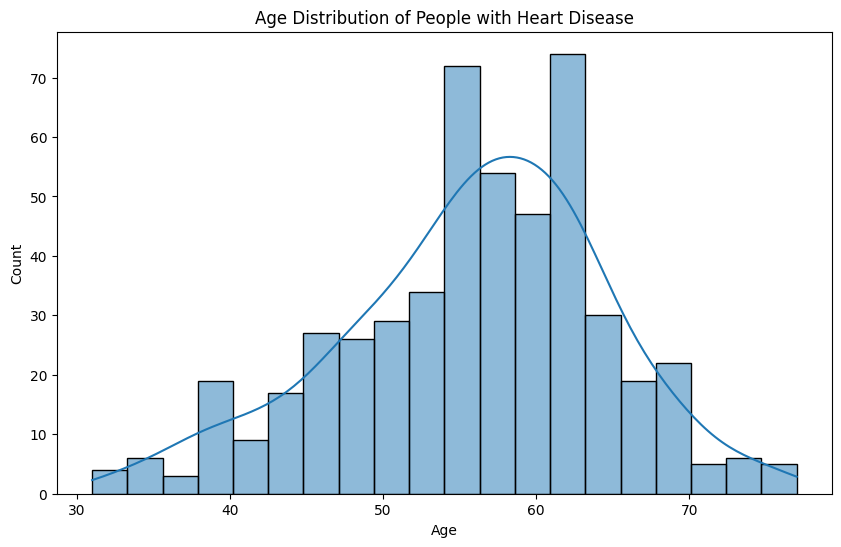

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the file path
path = "/Users/moiz/Downloads"
filename_read = os.path.join(path, "heart.csv")

# Load the dataset
data = pd.read_csv(filename_read)

# Create a histogram of age distribution for people with heart disease
plt.figure(figsize=(10, 6))
sns.histplot(data=data[data['HeartDisease'] == 1], x='Age', bins=20, kde=True)
plt.title('Age Distribution of People with Heart Disease')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Set the file path
path = "/Users/moiz/Downloads"
filename_read = os.path.join(path, "heart.csv")

# Load the dataset
data = pd.read_csv(filename_read)

# Exploratory Data Analysis (EDA)
print("Dataset shape:", data.shape)
print("\nDataset info:")
print(data.info())
print("\nDataset description:")
print(data.describe())

print("\nMissing values:")
print(data.isnull().sum())

print("\nClass balance:")
print(data['HeartDisease'].value_counts(normalize=True))

# Separate numeric and categorical columns
numeric_columns = data.select_dtypes(include=[np.number]).columns
categorical_columns = data.select_dtypes(exclude=[np.number]).columns

# Visualize numeric feature distributions
plt.figure(figsize=(12, 8))
data[numeric_columns].hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

# Correlation heatmap for numeric columns
plt.figure(figsize=(12, 10))
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()

# Analyze categorical variables
for cat_col in categorical_columns:
    if cat_col != 'HeartDisease':
        plt.figure(figsize=(10, 6))
        sns.countplot(x=cat_col, hue='HeartDisease', data=data)
        plt.title(f'Distribution of {cat_col} by Heart Disease')
        plt.show()

# Prepare the data
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

# Encode categorical variables
le = LabelEncoder()
for col in categorical_columns:
    if col in X.columns:
        X[col] = le.fit_transform(X[col])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Model evaluation and comparison
results = []
for model_name, model in models.items():
    print(f"\n{model_name}:")
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
    print(f"Cross-validation ROC AUC: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'ROC AUC': roc_auc
    })
    
    print("Test Results:")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-score: {f1:.3f}")
    print(f"ROC AUC: {roc_auc:.3f}")
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Display results in a table
results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df)

# Feature Importance (for Random Forest)
rf_model = models['Random Forest']
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance (Random Forest)')
plt.show()

print("\nTop 5 Important Features:")
print(feature_importance.head())

# Error Analysis
rf_predictions = rf_model.predict(X_test_scaled)
misclassified = X_test[rf_predictions != y_test]
print("\nMisclassified Instances:")
print(misclassified.describe())

print("\nAnalysis complete.")

Heart Disease Dataset Analysis

Dataset Overview:
The dataset contains 918 rows and 12 columns.

Here's a summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 86.2+ KB
None

Statistical Description of Numerical Features:
              Age  

<Figure size 1200x800 with 0 Axes>

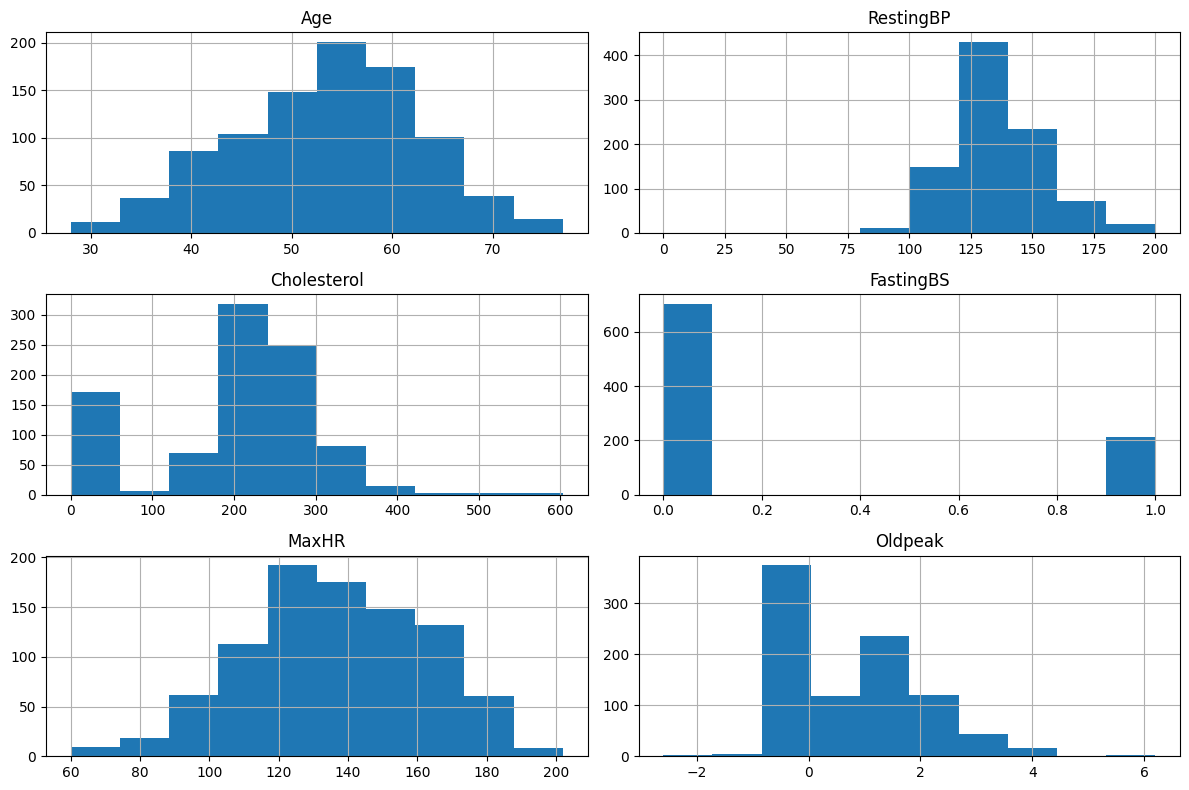


Correlation Heatmap:
This heatmap shows the correlation between numeric features. Darker colors indicate stronger correlations.


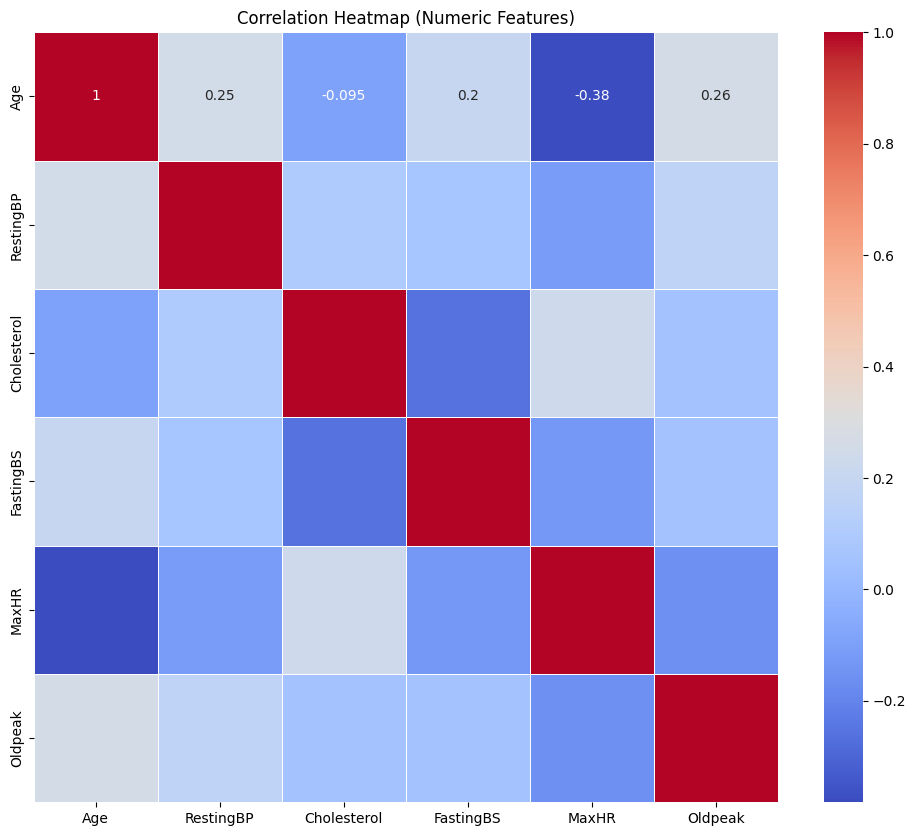


Analysis of Categorical Variables:

Distribution of Sex by Heart Disease Status:
This plot shows how Sex is distributed among Negative and Positive heart disease cases.


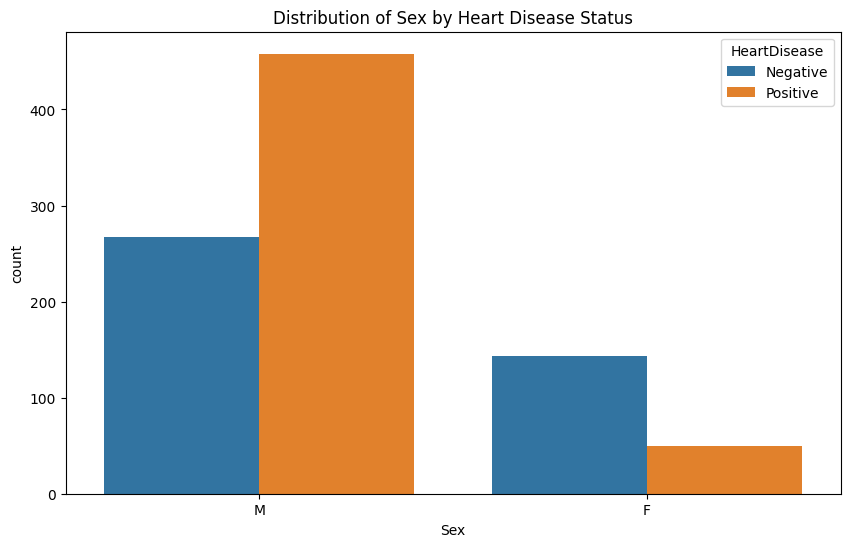


Distribution of ChestPainType by Heart Disease Status:
This plot shows how ChestPainType is distributed among Negative and Positive heart disease cases.


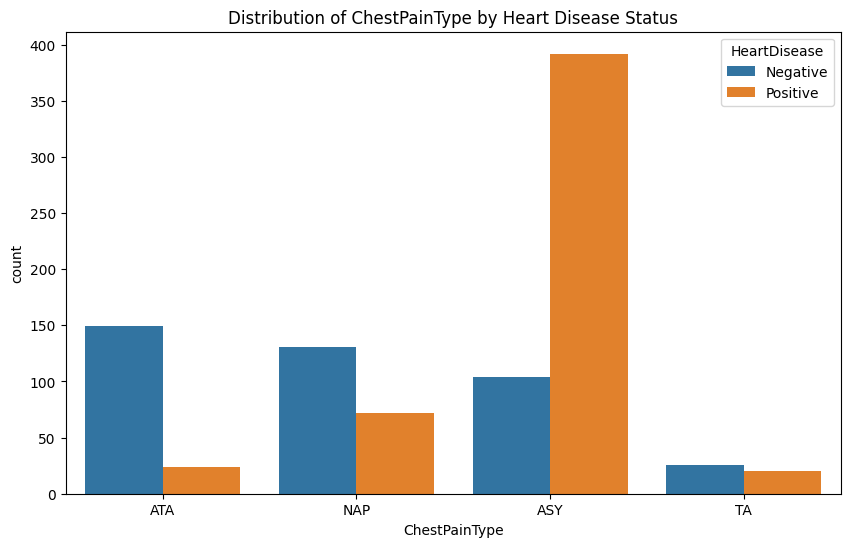


Distribution of RestingECG by Heart Disease Status:
This plot shows how RestingECG is distributed among Negative and Positive heart disease cases.


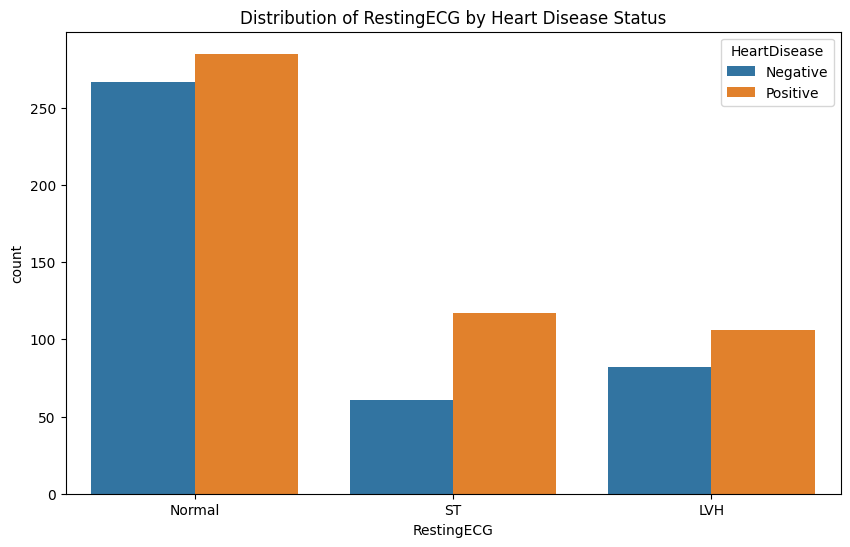


Distribution of ExerciseAngina by Heart Disease Status:
This plot shows how ExerciseAngina is distributed among Negative and Positive heart disease cases.


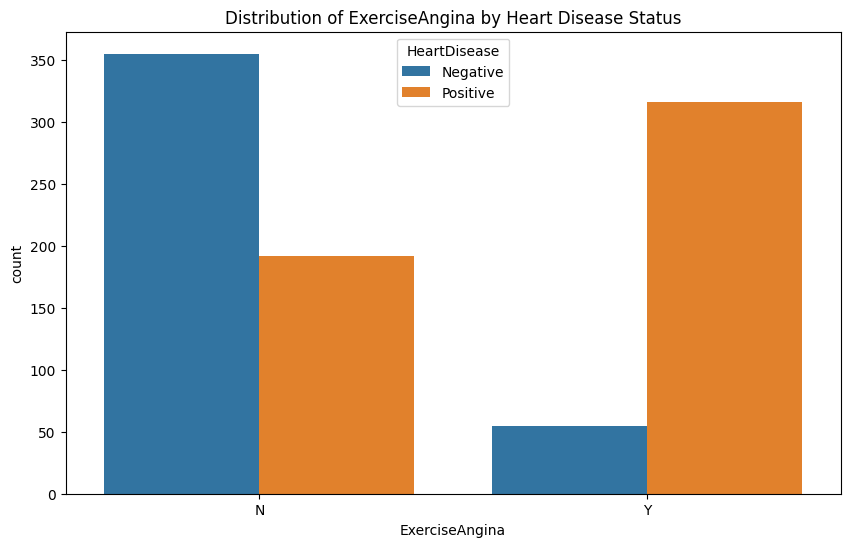


Distribution of ST_Slope by Heart Disease Status:
This plot shows how ST_Slope is distributed among Negative and Positive heart disease cases.


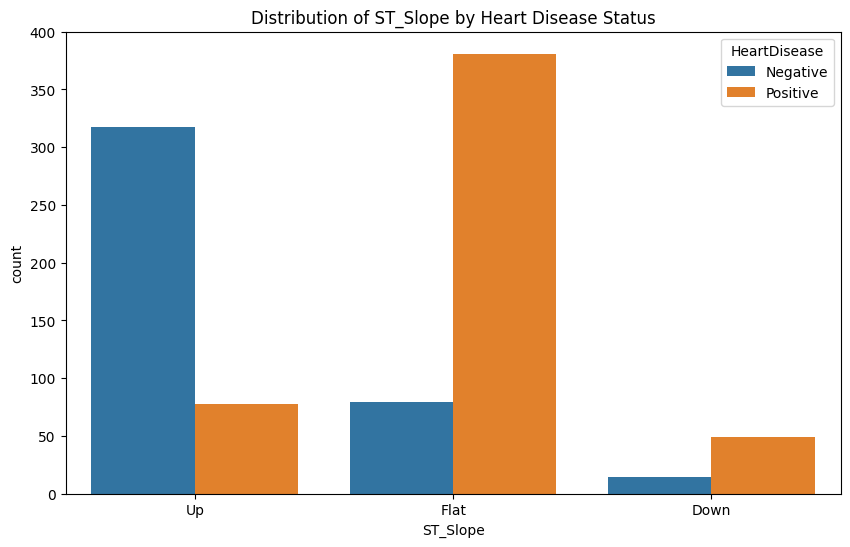


Model Evaluation:

Logistic Regression:
Cross-validation ROC AUC: 0.916 (+/- 0.045)
Test Results:
Accuracy: 0.848
Precision: 0.907
Recall: 0.822
F1-score: 0.863
ROC AUC: 0.853

Confusion Matrix:
This matrix shows the number of correct and incorrect predictions made by the model.
True Negative (top-left), False Positive (top-right), False Negative (bottom-left), True Positive (bottom-right)


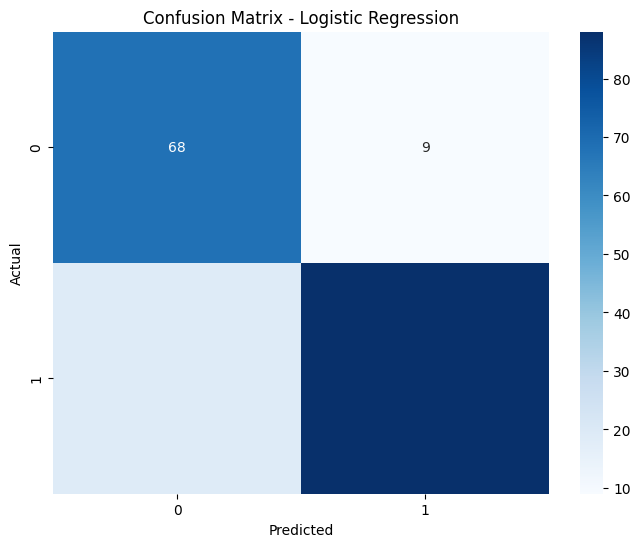


Random Forest:
Cross-validation ROC AUC: 0.922 (+/- 0.037)
Test Results:
Accuracy: 0.875
Precision: 0.896
Recall: 0.888
F1-score: 0.892
ROC AUC: 0.872

Confusion Matrix:
This matrix shows the number of correct and incorrect predictions made by the model.
True Negative (top-left), False Positive (top-right), False Negative (bottom-left), True Positive (bottom-right)


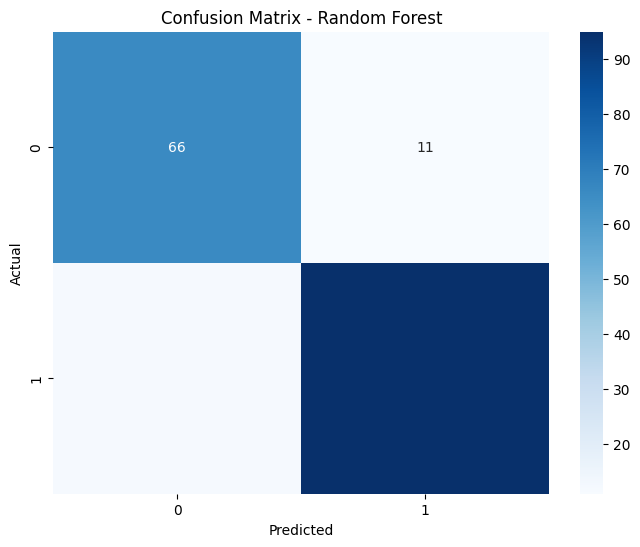


Model Comparison:
This table compares the performance of different models across various metrics.
                 Model  Accuracy  Precision   Recall  F1-score   ROC AUC
0  Logistic Regression  0.847826   0.907216  0.82243  0.862745  0.852773
1        Random Forest  0.875000   0.896226  0.88785  0.892019  0.872497

Feature Importance:
This plot shows the relative importance of each feature in the Random Forest model.


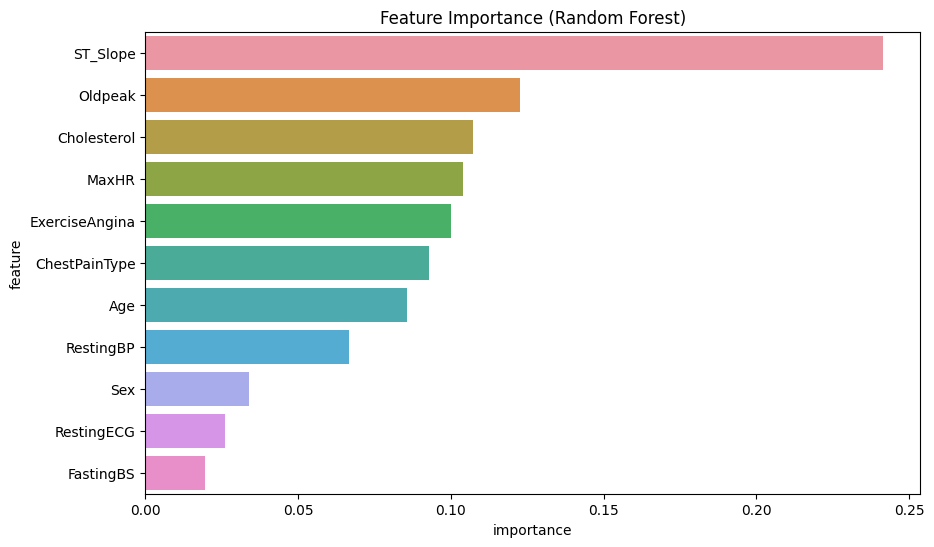


Top 5 Important Features:
           feature  importance
10        ST_Slope    0.241583
9          Oldpeak    0.122604
4      Cholesterol    0.107333
7            MaxHR    0.103918
8   ExerciseAngina    0.100037

Misclassified Instances:
This provides a statistical summary of the instances that were incorrectly classified by the Random Forest model.
             Age        Sex  ChestPainType   RestingBP  Cholesterol  \
count  23.000000  23.000000      23.000000   23.000000    23.000000   
mean   53.217391   0.782609       1.391304  130.478261   213.000000   
std    10.162125   0.421741       1.269901   23.037261    79.885714   
min    37.000000   0.000000       0.000000   80.000000     0.000000   
25%    47.000000   1.000000       0.000000  119.000000   195.000000   
50%    52.000000   1.000000       2.000000  130.000000   233.000000   
75%    58.500000   1.000000       2.500000  142.500000   258.500000   
max    76.000000   1.000000       3.000000  192.000000   303.000000   

       

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Set the file path
path = "/Users/moiz/Downloads"
filename_read = os.path.join(path, "heart.csv")

# Load the dataset
data = pd.read_csv(filename_read)

# Replace 0 and 1 with "Negative" and "Positive" in the HeartDisease column
data['HeartDisease'] = data['HeartDisease'].map({0: "Negative", 1: "Positive"})

print("Heart Disease Dataset Analysis")
print("==============================")

# Exploratory Data Analysis (EDA)
print("\nDataset Overview:")
print(f"The dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")
print("\nHere's a summary of the dataset:")
print(data.info())

print("\nStatistical Description of Numerical Features:")
print(data.describe())

print("\nChecking for Missing Values:")
missing_values = data.isnull().sum()
print(missing_values)
if missing_values.sum() == 0:
    print("There are no missing values in the dataset.")
else:
    print("The above columns have missing values.")

print("\nClass Balance:")
class_balance = data['HeartDisease'].value_counts(normalize=True)
print(class_balance)
print("This shows the proportion of Negative (no heart disease) and Positive (heart disease) cases in the dataset.")

# Separate numeric and categorical columns
numeric_columns = data.select_dtypes(include=[np.number]).columns
categorical_columns = data.select_dtypes(exclude=[np.number]).columns

print("\nVisualization of Numeric Features:")
print("The following histograms show the distribution of each numeric feature in the dataset.")
plt.figure(figsize=(12, 8))
data[numeric_columns].hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

print("\nCorrelation Heatmap:")
print("This heatmap shows the correlation between numeric features. Darker colors indicate stronger correlations.")
plt.figure(figsize=(12, 10))
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()

print("\nAnalysis of Categorical Variables:")
for cat_col in categorical_columns:
    if cat_col != 'HeartDisease':
        print(f"\nDistribution of {cat_col} by Heart Disease Status:")
        print(f"This plot shows how {cat_col} is distributed among Negative and Positive heart disease cases.")
        plt.figure(figsize=(10, 6))
        sns.countplot(x=cat_col, hue='HeartDisease', data=data)
        plt.title(f'Distribution of {cat_col} by Heart Disease Status')
        plt.show()

# Prepare the data
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

# Encode categorical variables
le = LabelEncoder()
for col in categorical_columns:
    if col in X.columns:
        X[col] = le.fit_transform(X[col])

# Encode target variable
y = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

print("\nModel Evaluation:")
# Model evaluation and comparison
results = []
for model_name, model in models.items():
    print(f"\n{model_name}:")
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
    print(f"Cross-validation ROC AUC: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'ROC AUC': roc_auc
    })
    
    print("Test Results:")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-score: {f1:.3f}")
    print(f"ROC AUC: {roc_auc:.3f}")
    
    print("\nConfusion Matrix:")
    print("This matrix shows the number of correct and incorrect predictions made by the model.")
    print("True Negative (top-left), False Positive (top-right), False Negative (bottom-left), True Positive (bottom-right)")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Display results in a table
results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print("This table compares the performance of different models across various metrics.")
print(results_df)

# Feature Importance (for Random Forest)
rf_model = models['Random Forest']
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print("This plot shows the relative importance of each feature in the Random Forest model.")
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance (Random Forest)')
plt.show()

print("\nTop 5 Important Features:")
print(feature_importance.head())




# Error Analysis
rf_predictions = rf_model.predict(X_test_scaled)
misclassified = X_test[rf_predictions != y_test]
print("\nMisclassified Instances:")
print("This provides a statistical summary of the instances that were incorrectly classified by the Random Forest model.")
print(misclassified.describe())

print("\nAnalysis complete.")

Starting the program...
Loading the dataset...
Dataset Analysis

Dataset Overview:
The dataset contains 918 rows and 12 columns.

Here's a summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None

Statistical Description of Numeri

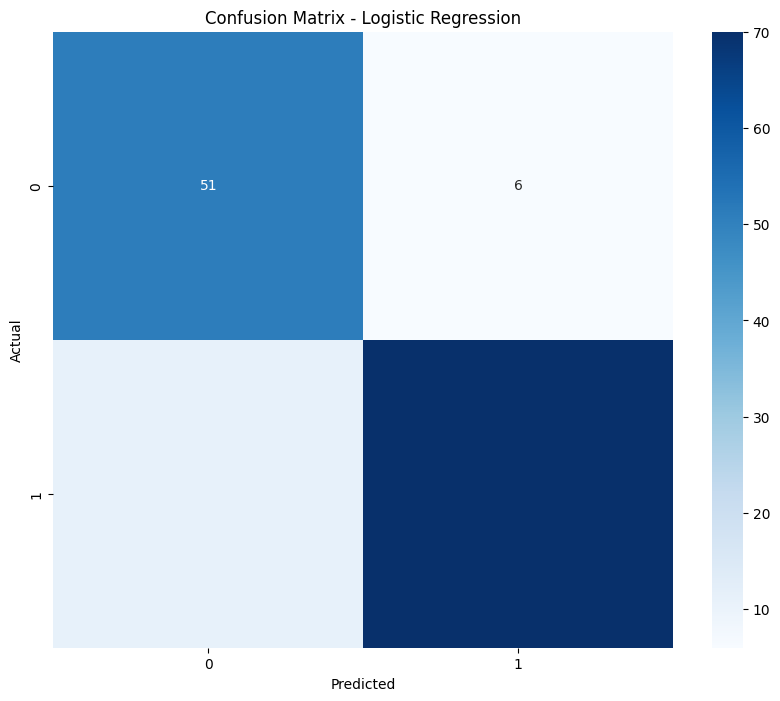

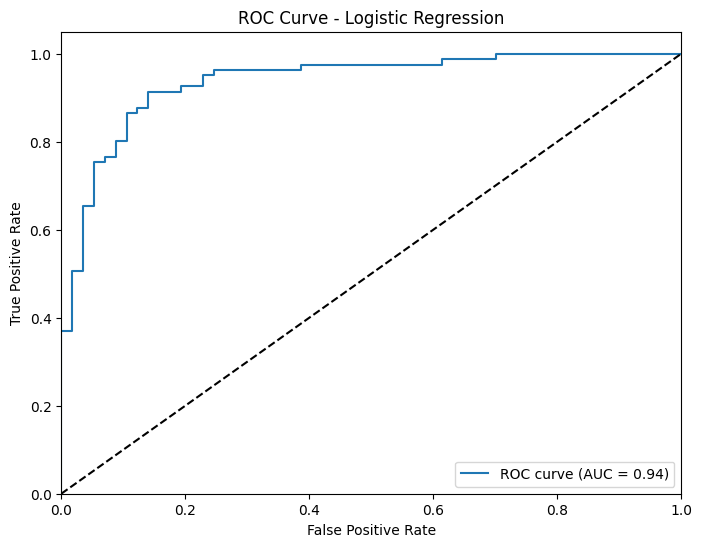


Evaluating Random Forest...
Starting GridSearchCV...
Best parameters: {'model__max_depth': None, 'model__n_estimators': 200}
Validation Results:
Accuracy: 0.877
Precision: 0.921
Recall: 0.864
F1-score: 0.892
ROC AUC: 0.937


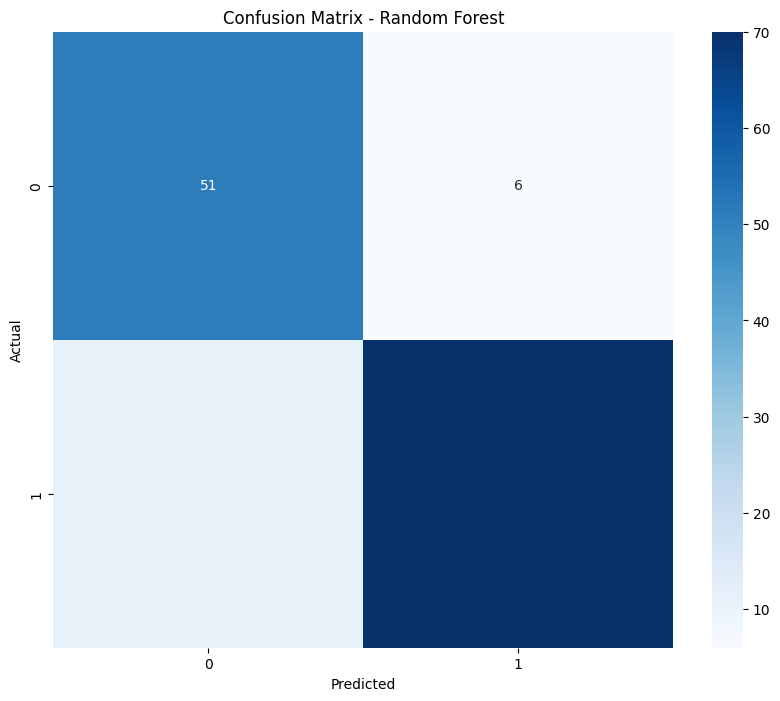

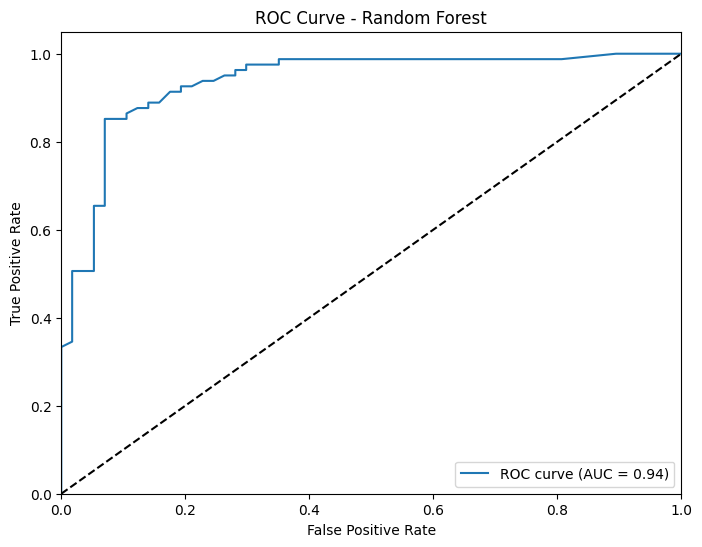


Evaluating SVM...
Starting GridSearchCV...
Best parameters: {'model__C': 1, 'model__kernel': 'rbf'}
Validation Results:
Accuracy: 0.877
Precision: 0.900
Recall: 0.889
F1-score: 0.894
ROC AUC: 0.946


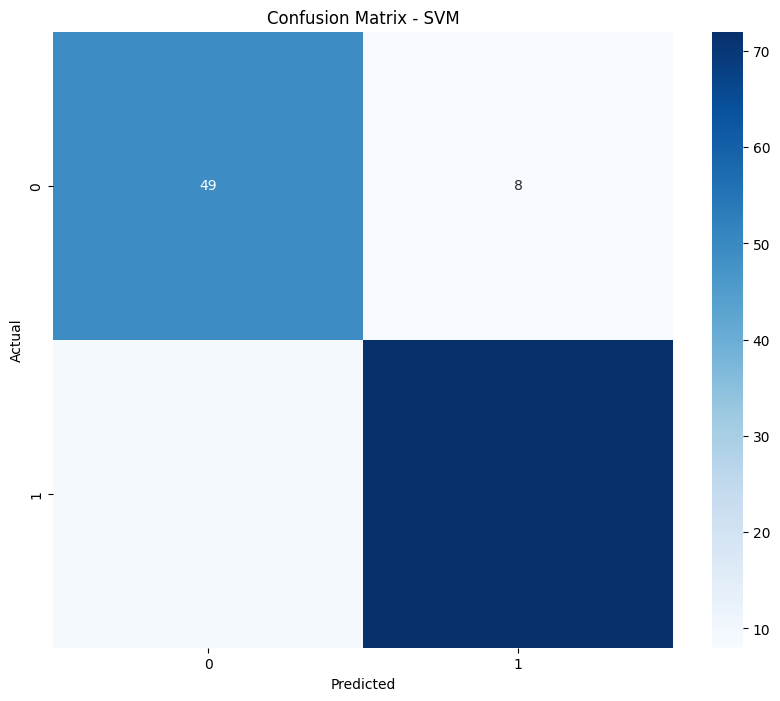

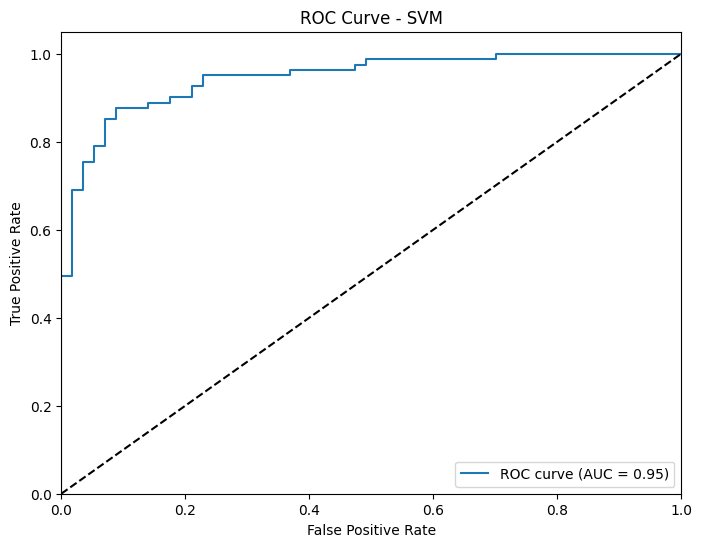


Model Comparison:
                 Model  Accuracy  Precision    Recall  F1-score   ROC AUC
0  Logistic Regression  0.876812   0.921053  0.864198   0.89172  0.937838
1        Random Forest  0.876812   0.921053  0.864198   0.89172  0.936647
2                  SVM  0.876812   0.900000  0.888889   0.89441  0.946069
Calculating feature importance...
An error occurred while calculating feature importance: 'SVC' object has no attribute 'feature_importances_'
Generating learning curves...


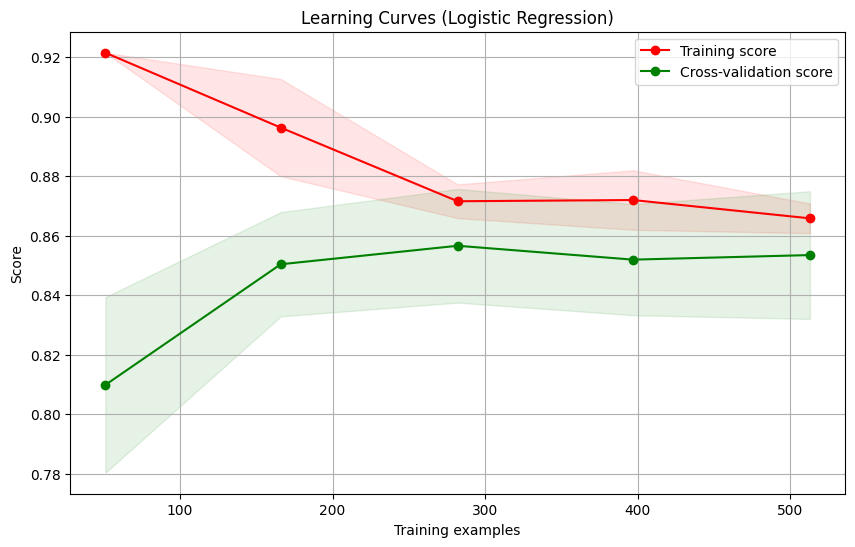

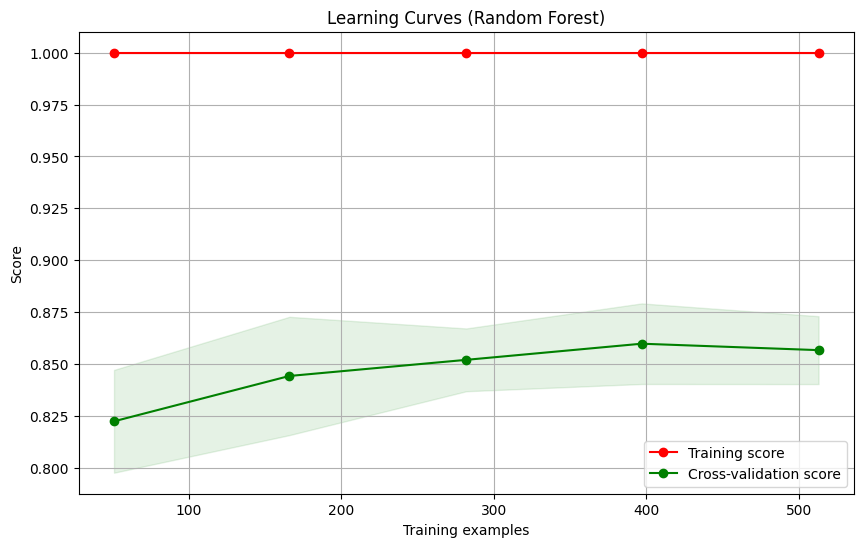

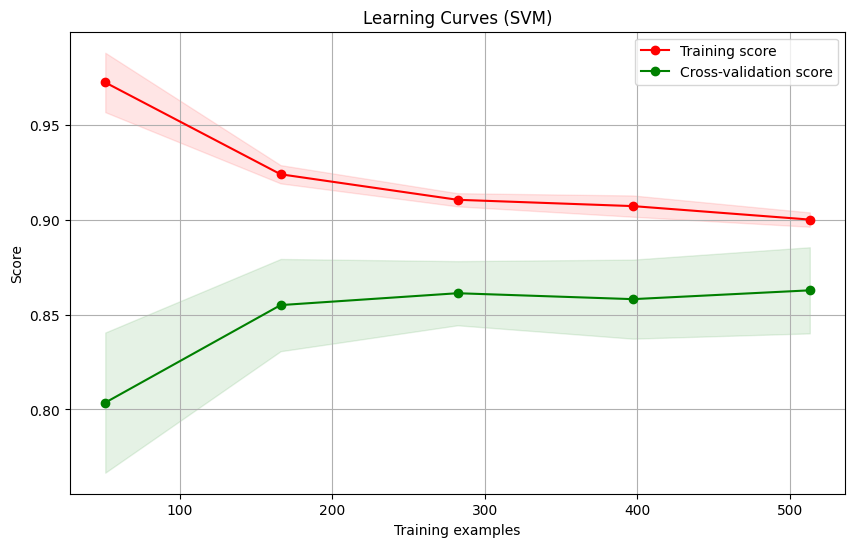


Analysis complete.


In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

print("Starting the program...")

# Set the file path
path = "/Users/moiz/Downloads"
filename_read = os.path.join(path, "heart.csv")

# Load the dataset
print("Loading the dataset...")
data = pd.read_csv(filename_read)

print("Dataset Analysis")
print("==============================")

# Exploratory Data Analysis (EDA)
print("\nDataset Overview:")
print(f"The dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")
print("\nHere's a summary of the dataset:")
print(data.info())

print("\nStatistical Description of Numerical Features:")
print(data.describe())

print("\nChecking for Missing Values:")
missing_values = data.isnull().sum()
print(missing_values)

# Identify numeric and categorical columns
numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Target column
target_column = 'HeartDisease'

print("Preparing the data...")
# Create preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Prepare X and y
X = data.drop(columns=[target_column])
y = data[target_column]

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Data preparation complete.")

# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True)
}

# Model evaluation and comparison
results = []
for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...")
    
    # Create a pipeline with preprocessor and model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Parameter tuning
    if model_name == 'Logistic Regression':
        param_grid = {'model__C': [0.001, 0.01, 0.1, 1, 10, 100], 'model__max_iter': [1000]}
    elif model_name == 'Random Forest':
        param_grid = {'model__n_estimators': [50, 100, 200], 'model__max_depth': [5, 10, None]}
    else:  # SVM
        param_grid = {'model__C': [0.1, 1, 10], 'model__kernel': ['rbf', 'linear']}
    
    print("Starting GridSearchCV...")
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    print(f"Best parameters: {grid_search.best_params_}")
    best_model = grid_search.best_estimator_
    
    # Make predictions
    y_pred = best_model.predict(X_val)
    y_pred_proba = best_model.predict_proba(X_val)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred_proba)
    
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'ROC AUC': roc_auc
    })
    
    print("Validation Results:")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-score: {f1:.3f}")
    print(f"ROC AUC: {roc_auc:.3f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Display results in a table
results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df)

print("Calculating feature importance...")
# Feature Importance (for Random Forest)
if 'Random Forest' in models:
    try:
        rf_model = grid_search.best_estimator_.named_steps['model']
        
        # Fit the preprocessor
        preprocessor.fit(X_train)
        
        # Get feature names
        numeric_feature_names = numeric_features
        categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features).tolist()
        feature_names = numeric_feature_names + categorical_feature_names
        
        feature_importance = pd.DataFrame({
            'feature': feature_names,
            'importance': rf_model.feature_importances_
        }).sort_values('importance', ascending=False)

        print("\nFeature Importance:")
        plt.figure(figsize=(10, 6))
        sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
        plt.title('Top 10 Feature Importance (Random Forest)')
        plt.show()

        print("\nTop 5 Important Features:")
        print(feature_importance.head())
    except Exception as e:
        print(f"An error occurred while calculating feature importance: {str(e)}")

print("Generating learning curves...")
# Learning Curves
for model_name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    train_sizes, train_scores, val_scores = learning_curve(
        pipeline, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=5)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.title(f"Learning Curves ({model_name})")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()

print("\nAnalysis complete.")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, classification_report

print("Starting the program...")

# Set the file path
path = "/Users/moiz/Downloads"
filename_read = os.path.join(path, "heart_2022_no_nans.csv")

# Load the dataset
try:
    data = pd.read_csv(filename_read)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file '{filename_read}' was not found.")
    print("Please make sure the file is in the correct directory and the name is correct.")
    exit()
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    exit()

print("\nDataset Information:")
print(data.info())

# Separate numerical and categorical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Summary statistics for numerical features
print("\nSummary Statistics for Numerical Features:")
print(data[numerical_columns].describe().transpose().to_string())

# Summary of categorical features
print("\nSummary of Categorical Features:")
for col in categorical_columns:
    print(f"\n{col}:")
    print(data[col].value_counts(normalize=True).to_string())

# Data preprocessing
print("\nPreprocessing data...")
X = data.drop('HadHeartAttack', axis=1)
y = data['HadHeartAttack']

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Handle categorical variables
X = pd.get_dummies(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split into training and test sets.")

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Feature scaling completed.")

# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Linear Regression': LinearRegression()
}

# Train and evaluate models
results = []
for name, model in models.items():
    print(f"\nApplying {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    if name == 'Linear Regression':
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results.append({
            'Model': name,
            'MSE': mse,
            'R-squared': r2
        })
    else:
        accuracy = accuracy_score(y_test, y_pred)
        results.append({
            'Model': name,
            'Accuracy': accuracy,
            'Classification Report': classification_report(y_test, y_pred, output_dict=True)
        })

# Display results table
print("\nModel Performance Comparison:")
results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))

# Feature Importance
print("\nCalculating feature importance...")

# Logistic Regression
lr_importance = pd.DataFrame({'feature': X.columns, 'importance': abs(models['Logistic Regression'].coef_[0])})
lr_importance = lr_importance.sort_values('importance', ascending=False)

# Random Forest
rf_importance = pd.DataFrame({'feature': X.columns, 'importance': models['Random Forest'].feature_importances_})
rf_importance = rf_importance.sort_values('importance', ascending=False)

print("\nTop 10 Important Features (Logistic Regression):")
print(lr_importance.head(10).to_string(index=False))

print("\nTop 10 Important Features (Random Forest):")
print(rf_importance.head(10).to_string(index=False))

# Visualize feature importance
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
sns.barplot(x='importance', y='feature', data=lr_importance.head(10))
plt.title('Top 10 Feature Importance (Logistic Regression)')

plt.subplot(2, 1, 2)
sns.barplot(x='importance', y='feature', data=rf_importance.head(10))
plt.title('Top 10 Feature Importance (Random Forest)')

plt.tight_layout()
plt.show()

print("\nAnalysis completed. Please check the output tables and the plots.")

Starting the program...
Dataset loaded successfully.

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma  

Data split into training and test sets.
Feature scaling completed.

Applying Logistic Regression...

Applying Neural Network...


Starting the program...
Dataset loaded successfully.
Using a sample of 10000 rows for faster processing.

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 194767 to 88864
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      10000 non-null  object 
 1   Sex                        10000 non-null  object 
 2   GeneralHealth              10000 non-null  object 
 3   PhysicalHealthDays         10000 non-null  float64
 4   MentalHealthDays           10000 non-null  float64
 5   LastCheckupTime            10000 non-null  object 
 6   PhysicalActivities         10000 non-null  object 
 7   SleepHours                 10000 non-null  float64
 8   RemovedTeeth               10000 non-null  object 
 9   HadHeartAttack             10000 non-null  object 
 10  HadAngina                  10000 non-null  object 
 11  HadStroke                  1000


Applying Neural Network...

Applying Random Forest...

Applying Linear Regression...

Model Performance Comparison:
              Model  Accuracy                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Classification Report      MSE  R-squared
Logistic Regression    0.9405  {'0': {'precision': 0.9498977505112475, 'recall': 0.9888238424693986, 'f1-score': 0.9689700130378096, 'support': 1879.0}, '1': {'precision': 0.5227272727272727, 'recall': 0.19008264462809918, 'f1-score': 0.2787878787878788, 'support': 121.0}, 'accuracy': 0.9405, 'macro avg': {'precision': 

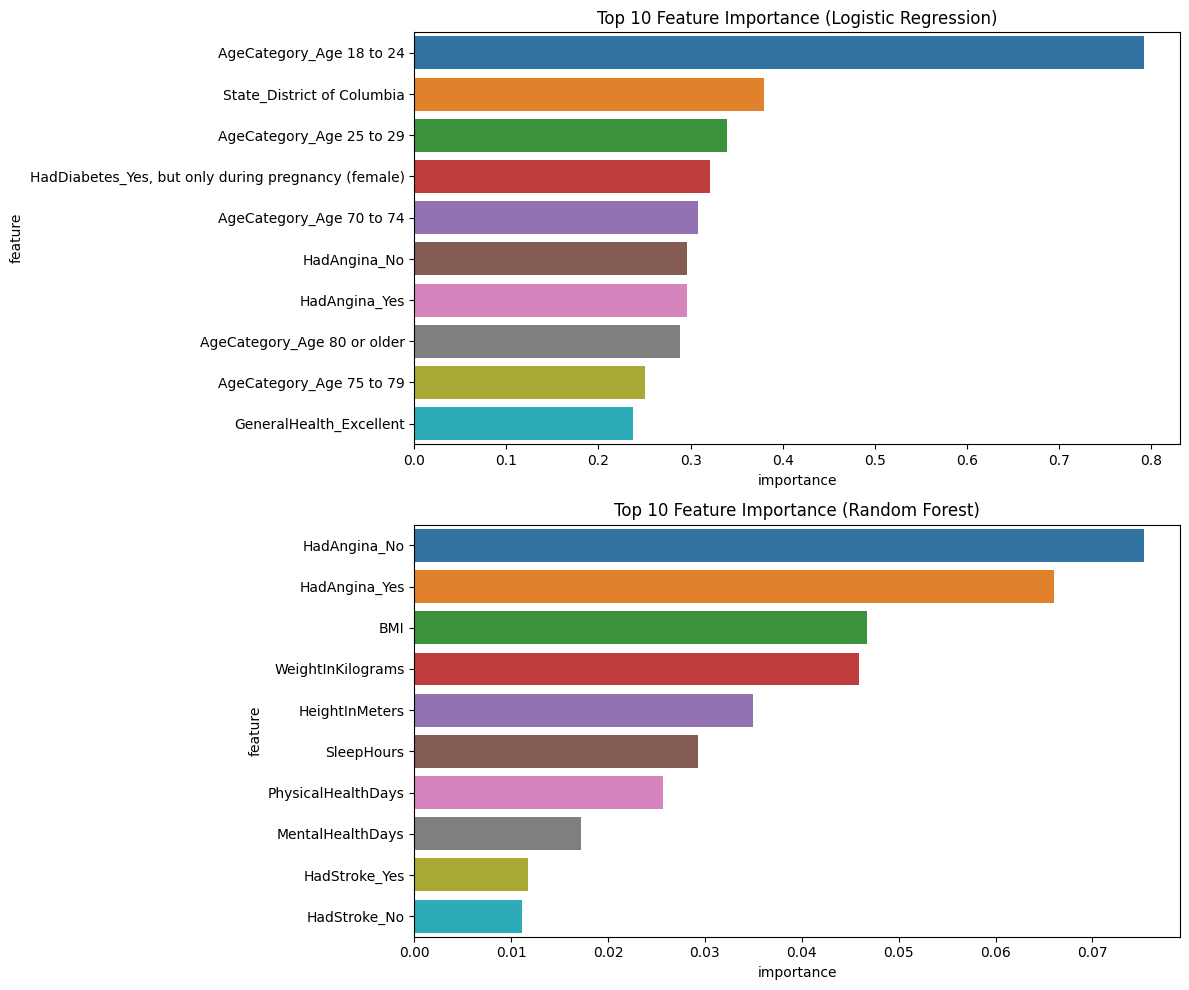


Analysis completed. Please check the output tables and the plots.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, classification_report

print("Starting the program...")

# Set the file path
path = "/Users/moiz/Downloads"
filename_read = os.path.join(path, "heart_2022_no_nans.csv")

# Load the dataset
try:
    data = pd.read_csv(filename_read)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file '{filename_read}' was not found.")
    print("Please make sure the file is in the correct directory and the name is correct.")
    exit()
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    exit()

# Option to restrict dataset size for faster runtime
use_full_dataset = False  # Set to True to use the full dataset
if not use_full_dataset:
    sample_size = 10000  # Adjust this value as needed
    data = data.sample(n=min(sample_size, len(data)), random_state=42)
    print(f"Using a sample of {len(data)} rows for faster processing.")

print("\nDataset Information:")
print(data.info())

# Rest of the code remains the same...

# Separate numerical and categorical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Summary statistics for numerical features
print("\nSummary Statistics for Numerical Features:")
print(data[numerical_columns].describe().transpose().to_string())

# Summary of categorical features
print("\nSummary of Categorical Features:")
for col in categorical_columns:
    print(f"\n{col}:")
    print(data[col].value_counts(normalize=True).to_string())

# Data preprocessing
print("\nPreprocessing data...")
X = data.drop('HadHeartAttack', axis=1)
y = data['HadHeartAttack']

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Handle categorical variables
X = pd.get_dummies(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split into training and test sets.")

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Feature scaling completed.")

# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'Linear Regression': LinearRegression()
}

# Train and evaluate models
results = []
for name, model in models.items():
    print(f"\nApplying {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    if name == 'Linear Regression':
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results.append({
            'Model': name,
            'MSE': mse,
            'R-squared': r2
        })
    else:
        accuracy = accuracy_score(y_test, y_pred)
        results.append({
            'Model': name,
            'Accuracy': accuracy,
            'Classification Report': classification_report(y_test, y_pred, output_dict=True)
        })

# Display results table
print("\nModel Performance Comparison:")
results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))

# Feature Importance
print("\nCalculating feature importance...")

# Logistic Regression
lr_importance = pd.DataFrame({'feature': X.columns, 'importance': abs(models['Logistic Regression'].coef_[0])})
lr_importance = lr_importance.sort_values('importance', ascending=False)

# Random Forest
rf_importance = pd.DataFrame({'feature': X.columns, 'importance': models['Random Forest'].feature_importances_})
rf_importance = rf_importance.sort_values('importance', ascending=False)

print("\nTop 10 Important Features (Logistic Regression):")
print(lr_importance.head(10).to_string(index=False))

print("\nTop 10 Important Features (Random Forest):")
print(rf_importance.head(10).to_string(index=False))

# Visualize feature importance
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
sns.barplot(x='importance', y='feature', data=lr_importance.head(10))
plt.title('Top 10 Feature Importance (Logistic Regression)')

plt.subplot(2, 1, 2)
sns.barplot(x='importance', y='feature', data=rf_importance.head(10))
plt.title('Top 10 Feature Importance (Random Forest)')

plt.tight_layout()
plt.show()

print("\nAnalysis completed. Please check the output tables and the plots.")